In [9]:
import pandas as pd
df = pd.read_csv("combsort.csv")
df

,N,time,number of swaps
0,100,0,733
1,5100,59,870402
2,10100,169,3022233
3,15100,458,6557712
4,20100,742,13978595
5,25100,1244,19716164
6,30100,1835,27406856
7,35100,2302,36140290
8,40100,3162,51866889
9,45100,4155,61565115


[Text(0.5, 0, 'N'), Text(0, 0.5, 'number of swaps')]

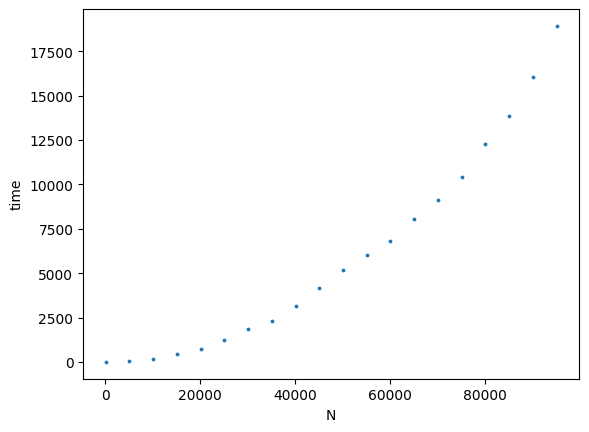

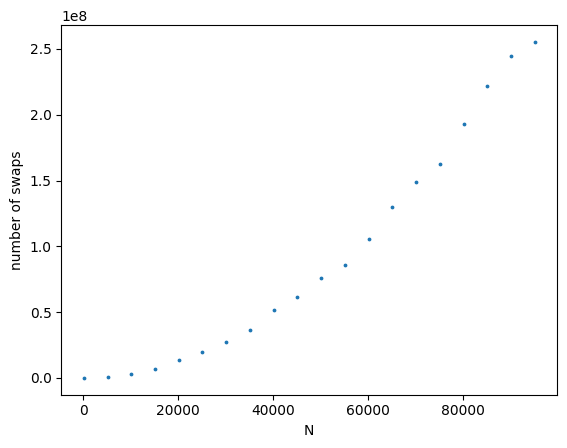

In [11]:
from matplotlib import pyplot as plt
import numpy as np
N = np.array(df["N"])
time = np.array(df["time"])
num = np.array(df['number of swaps'])
fig, ax = plt.subplots()
ax.scatter(N, time, s=3)
ax.set(xlabel='N', ylabel='time')
fig, ax = plt.subplots()
ax.scatter(N, num, s=3)
ax.set(xlabel='N', ylabel='number of swaps')